In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import math 
from tqdm import tqdm


In [2]:
pd.set_option('display.max_columns', None)

In [1]:
n = 33
arboles = f'../labs/arboles_1000_head.csv'
regresion = f'../runs/run_{n}/regression_{n}_head.csv'
normal = f'../runs/run_{n}/normalizaded_{n}_head.csv'
result = f'../runs/run_{n}/calculo_bio_car_{n}_head.csv'
#/home/gomosak/conafor/SEByc/runs/run_15/regression_15_head.csv /home/gomosak/conafor/SEByc/runs/run_15/calculo_bio_car_15_head.csv

In [3]:
modelos = pd.read_csv("/home/gomosak/conafor/SEByc/csvs/modelo2.csv")

In [4]:
modelos

,id,id_anterior,variable_resultado,tipo,Funciones,ecuacion,ecuacion_php,especie_id,familia,genero,epiteto,condicion,componente,diametro_min,diametro_max,numero_arboles,r2,anio_publicacion,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n2,clave_ecoregion_n3,clave_ecoregion_n4,clave_bur,clave_estado_inegi,activo,id_especie_mn,id_modelo_mn,referencia,id_referencia,notas
0,1,1.0,b,NaN,alometrica,(0.1649)*(d130^2.2755),(0.1649)*([d130]**2.2755),NaN,Betulaceae,Alnus,arguta,Vivo,Todo el árbol,6.2,45.0,22.0,0.9677,2001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,329.0,Ecuaciones Rojas,1.0,NaN
1,2,2.0,b,NaN,alometrica,Exp(-2.14)*(d130^2.23),Exp(-2.14)*([d130]**2.23),NaN,Betulaceae,Alnus,glabrata,Vivo,Todo el árbol,3.9,23.5,10.0,0.9700,2002.0,NaN,14.0,14.5,14.5.1,14.5.1.2,NaN,NaN,1,17201.0,13.0,Ecuaciones Rojas,3.0,NaN
2,3,3.0,b,BxP,alometrica,Exp(-2.14)*(d130^2.23),Exp(-2.14)*([d130]**2.23),NaN,Betulaceae,Alnus,glabrata,Vivo,Todo el árbol,3.9,23.5,10.0,0.9700,2002.0,NaN,15.0,15.3,15.3.1,15.3.1.1,NaN,NaN,1,17201.0,13.0,Ecuaciones Rojas,3.0,NaN
3,4,4.0,b,NaN,alometrica,Exp(-2.14)*(d130^2.23),Exp(-2.14)*([d130]**2.23),NaN,Betulaceae,Alnus,NaN,Vivo,Todo el árbol,3.9,23.5,10.0,0.9700,2002.0,NaN,14.0,14.5,14.5.1,14.5.1.2,NaN,NaN,1,17201.0,13.0,Ecuaciones Rojas,4.0,NaN
4,5,5.0,b,NaN,alometrica,Exp(-2.14)*(d130^2.23),Exp(-2.14)*([d130]**2.23),NaN,Betulaceae,Alnus,NaN,Vivo,Todo el árbol,3.9,23.5,10.0,0.9700,2002.0,NaN,15.0,15.3,15.3.1,15.3.1.1,NaN,NaN,1,17201.0,13.0,Ecuaciones Rojas,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3011,3012,2996.0,p,NaN,NaN,0.413145,0.413145,NaN,Vochysiaceae,NaN,NaN,Todos,Todo el árbol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,Promedio densidad por familia
3012,3013,2997.0,p,NaN,NaN,0.415,0.415,NaN,Winteraceae,NaN,NaN,Todos,Todo el árbol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,Promedio densidad por familia
3013,3014,2998.0,p,NaN,NaN,1.00546,1.00546,NaN,Zygophyllaceae,NaN,NaN,Todos,Todo el árbol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,Promedio densidad por familia
3014,3015,2999.0,b,NaN,alometrica,EXP(4.5+(7.7*ht)/103),EXP(4.5+(7.7*[ht])/103),NaN,Arecaceae,NaN,NaN,Vivo,Todo el árbol,NaN,NaN,NaN,0.9000,1985.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,Frangi y Lugo(1985),NaN,(2015) Ramairez Guargado; https://cicy.reposit...


In [5]:
modelos.iloc[2883, 6]

'(3.14159 * (([d130] / 2 / 100) ** 2) * [ht]) / 3'

In [20]:
#arboles = '../regression__head.csv'
df = pd.read_csv(arboles)

/tmp/ipykernel_67458/1703249939.py:2: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arboles)


In [8]:
df

,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad
0,2886174,2016,50760,1,Vivo,NaN,Malvaceae,Hampea,trilobata,NaN,NaN,14,16.0,NaN,8.3,6.4,20.622000,-87.336694,15.2,SMQ,493302,16,NaN,NaN,NaN,NaN,15,15.2.2,15.2.2.2,23,Quintana Roo,NaN
1,2886175,2016,50760,1,Vivo,NaN,Nyctaginaceae,Neea,psychotrioides,NaN,NaN,21,23.0,NaN,10.4,8.6,20.622000,-87.336694,15.2,SMQ,493309,23,NaN,NaN,NaN,NaN,15,15.2.2,15.2.2.2,23,Quintana Roo,NaN
2,2886176,2016,50760,1,Vivo,NaN,Fabaceae,Lysiloma,latisiliquum,NaN,NaN,29,34.0,NaN,32.8,10.3,20.622000,-87.336694,15.2,SMQ,493320,34,NaN,NaN,NaN,NaN,15,15.2.2,15.2.2.2,23,Quintana Roo,NaN
3,2886177,2016,50760,1,Vivo,NaN,Malvaceae,Luehea,speciosa,NaN,NaN,35,40.0,NaN,8.2,7.9,20.622000,-87.336694,15.2,SMQ,493326,40,NaN,NaN,NaN,NaN,15,15.2.2,15.2.2.2,23,Quintana Roo,NaN
4,2886178,2016,50760,1,Vivo,NaN,Sapotaceae,Sideroxylon,salicifolium,NaN,NaN,44,49.0,NaN,9.8,6.8,20.622000,-87.336694,15.2,SMQ,493335,49,NaN,NaN,NaN,NaN,15,15.2.2,15.2.2.2,23,Quintana Roo,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831326,3717500,2016,50303,1,Vivo,NaN,Fabaceae,Caesalpinia,platyloba,NaN,NaN,6,6.0,NaN,17.8,9.1,20.693639,-87.135167,15.2,SMQ,523099,6,NaN,NaN,NaN,NaN,15,15.2.2,15.2.2.2,23,Quintana Roo,NaN
831327,3717501,2016,50303,2,Vivo,NaN,Fabaceae,Swartzia,cubensis,NaN,NaN,12,13.0,NaN,8.3,7.8,20.693639,-87.135167,15.2,SMQ,523135,13,NaN,NaN,NaN,NaN,15,15.2.2,15.2.2.2,23,Quintana Roo,NaN
831328,3717502,2016,50303,2,Vivo,NaN,Arecaceae,Sabal,yapa,NaN,NaN,13,14.0,NaN,17.7,10.3,20.693639,-87.135167,15.2,SMQ,523136,14,NaN,NaN,NaN,NaN,15,15.2.2,15.2.2.2,23,Quintana Roo,NaN
831329,3717503,2016,50303,2,Vivo,NaN,Sapotaceae,Manilkara,zapota,NaN,NaN,24,25.0,NaN,32.3,9.1,20.693639,-87.135167,15.2,SMQ,523147,25,NaN,NaN,NaN,NaN,15,15.2.2,15.2.2.2,23,Quintana Roo,NaN


In [13]:
df.loc[75817:100000]

,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad
75817,75818,2005,12638,1,Vivo,1829.0,Oleaceae,Fraxinus,NaN,NaN,NaN,10,NaN,NaN,15.981378,8.90,2.0,28.881318,-109.03944,13.2,BE,caracteristica_arbolado,68956,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,26,Sonora,NaN
75818,75819,2005,12638,1,Vivo,5930.0,Fagaceae,Quercus,arizonica,NaN,NaN,11,NaN,NaN,17.000000,4.92,0.0,28.881318,-109.03944,13.2,BE,caracteristica_arbolado,68957,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,26,Sonora,NaN
75819,75820,2005,12638,1,Vivo,5930.0,Fagaceae,Quercus,arizonica,NaN,NaN,12,NaN,NaN,9.000000,3.60,0.0,28.881318,-109.03944,13.2,BE,caracteristica_arbolado,68958,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,26,Sonora,NaN
75820,75821,2005,12638,1,Vivo,5930.0,Fagaceae,Quercus,arizonica,NaN,NaN,13,NaN,NaN,7.800000,4.20,0.0,28.881318,-109.03944,13.2,BE,caracteristica_arbolado,68959,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,26,Sonora,NaN
75821,75822,2005,12638,1,Vivo,3343.0,Fagaceae,Quercus,NaN,NaN,NaN,14,NaN,NaN,12.100000,4.80,0.0,28.881318,-109.03944,13.2,BE,caracteristica_arbolado,68960,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,26,Sonora,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,99997,2005,14554,2,Vivo,16165.0,Fagaceae,Quercus,hypoleucoides,NaN,NaN,12,NaN,NaN,13.400000,5.20,0.0,28.542333,-108.50826,13.2,BE,caracteristica_arbolado,91726,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN
99997,99998,2005,14554,2,Vivo,16165.0,Fagaceae,Quercus,hypoleucoides,NaN,NaN,13,NaN,NaN,8.600000,4.50,0.0,28.542333,-108.50826,13.2,BE,caracteristica_arbolado,91727,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN
99998,99999,2005,14554,2,Vivo,16165.0,Fagaceae,Quercus,hypoleucoides,NaN,NaN,14,NaN,NaN,8.900000,6.00,0.0,28.542333,-108.50826,13.2,BE,caracteristica_arbolado,91728,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN
99999,100000,2005,14554,2,Vivo,32764.0,Fagaceae,Quercus,viminea,NaN,NaN,15,NaN,NaN,14.900000,6.00,0.0,28.542333,-108.50826,13.2,BE,caracteristica_arbolado,91729,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN


In [10]:
df.loc[75817:100000]

,Unnamed: 0,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad
75817,75817,75818,2005,12638,1,Vivo,1829.0,Oleaceae,Fraxinus,NaN,NaN,NaN,10,NaN,NaN,1407.0,8.90,0.0,28.881318,-109.03944,13.2,BE,caracteristica_arbolado,68956,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,26,Sonora,NaN
75818,75818,75819,2005,12638,1,Vivo,5930.0,Fagaceae,Quercus,arizonica,NaN,NaN,11,NaN,NaN,17.0,4.92,0.0,28.881318,-109.03944,13.2,BE,caracteristica_arbolado,68957,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,26,Sonora,NaN
75819,75819,75820,2005,12638,1,Vivo,5930.0,Fagaceae,Quercus,arizonica,NaN,NaN,12,NaN,NaN,9.0,3.60,0.0,28.881318,-109.03944,13.2,BE,caracteristica_arbolado,68958,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,26,Sonora,NaN
75820,75820,75821,2005,12638,1,Vivo,5930.0,Fagaceae,Quercus,arizonica,NaN,NaN,13,NaN,NaN,7.8,4.20,0.0,28.881318,-109.03944,13.2,BE,caracteristica_arbolado,68959,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,26,Sonora,NaN
75821,75821,75822,2005,12638,1,Vivo,3343.0,Fagaceae,Quercus,NaN,NaN,NaN,14,NaN,NaN,12.1,4.80,0.0,28.881318,-109.03944,13.2,BE,caracteristica_arbolado,68960,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,26,Sonora,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,99996,99997,2005,14554,2,Vivo,16165.0,Fagaceae,Quercus,hypoleucoides,NaN,NaN,12,NaN,NaN,13.4,5.20,0.0,28.542333,-108.50826,13.2,BE,caracteristica_arbolado,91726,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN
99997,99997,99998,2005,14554,2,Vivo,16165.0,Fagaceae,Quercus,hypoleucoides,NaN,NaN,13,NaN,NaN,8.6,4.50,0.0,28.542333,-108.50826,13.2,BE,caracteristica_arbolado,91727,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN
99998,99998,99999,2005,14554,2,Vivo,16165.0,Fagaceae,Quercus,hypoleucoides,NaN,NaN,14,NaN,NaN,8.9,6.00,0.0,28.542333,-108.50826,13.2,BE,caracteristica_arbolado,91728,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN
99999,99999,100000,2005,14554,2,Vivo,32764.0,Fagaceae,Quercus,viminea,NaN,NaN,15,NaN,NaN,14.9,6.00,0.0,28.542333,-108.50826,13.2,BE,caracteristica_arbolado,91729,1.0,2019-11-14 20:24:49.070,2019-11-14 20:24:49.070,NaN,13,13.2.1,13.2.1.1,8,Chihuahua,NaN


In [14]:
df.loc[(df['diametro'] >= 200), 'diametro']

Series([], Name: diametro, dtype: float64)

In [10]:
resulado = pd.read_csv(result)

/tmp/ipykernel_67458/144130055.py:1: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  resulado = pd.read_csv(result)


In [11]:
resulado

,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad,carbon_eq,biomasa_eq,densidad_eq,volumen_eq,volumen,biomasa,carbono
0,2886174,2016,50760,1,Vivo,NaN,Malvaceae,Hampea,trilobata,NaN,NaN,14,16.0,NaN,8.3,6.4,0.0,20.622000,-87.336694,15.2,SMQ,493302,16,NaN,NaN,NaN,NaN,15,15.2.2,15.2.2.2,23,Quintana Roo,NaN,[b]*0.43,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.35341,NaN,NaN,11.445461,4.921548
1,2886175,2016,50760,1,Vivo,NaN,Nyctaginaceae,Neea,psychotrioides,NaN,NaN,21,23.0,NaN,10.4,8.6,0.0,20.622000,-87.336694,15.2,SMQ,493309,23,NaN,NaN,NaN,NaN,15,15.2.2,15.2.2.2,23,Quintana Roo,NaN,[b]*0.447,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.31400,NaN,NaN,20.351254,9.097011
2,2886176,2016,50760,1,Vivo,NaN,Fabaceae,Lysiloma,latisiliquum,NaN,NaN,29,34.0,NaN,32.8,10.3,0.0,20.622000,-87.336694,15.2,SMQ,493320,34,NaN,NaN,NaN,NaN,15,15.2.2,15.2.2.2,23,Quintana Roo,NaN,(0.4709*[b]),Exp(-1.852)*([d130]**2.378),0.53441,NaN,NaN,631.589091,297.415303
3,2886177,2016,50760,1,Vivo,NaN,Malvaceae,Luehea,speciosa,NaN,NaN,35,40.0,NaN,8.2,7.9,0.0,20.622000,-87.336694,15.2,SMQ,493326,40,NaN,NaN,NaN,NaN,15,15.2.2,15.2.2.2,23,Quintana Roo,NaN,[b]*0.43,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.60574,NaN,NaN,22.238504,9.562557
4,2886178,2016,50760,1,Vivo,NaN,Sapotaceae,Sideroxylon,salicifolium,NaN,NaN,44,49.0,NaN,9.8,6.8,0.0,20.622000,-87.336694,15.2,SMQ,493335,49,NaN,NaN,NaN,NaN,15,15.2.2,15.2.2.2,23,Quintana Roo,NaN,[b]*0.4829,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.82171,NaN,NaN,35.529125,17.157015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831326,3717500,2016,50303,1,Vivo,NaN,Fabaceae,Caesalpinia,platyloba,NaN,NaN,6,6.0,NaN,17.8,9.1,0.0,20.693639,-87.135167,15.2,SMQ,523099,6,NaN,NaN,NaN,NaN,15,15.2.2,15.2.2.2,23,Quintana Roo,NaN,(0.5106*[b]),(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.89628,NaN,NaN,149.929731,76.554121
831327,3717501,2016,50303,2,Vivo,NaN,Fabaceae,Swartzia,cubensis,NaN,NaN,12,13.0,NaN,8.3,7.8,0.0,20.693639,-87.135167,15.2,SMQ,523135,13,NaN,NaN,NaN,NaN,15,15.2.2,15.2.2.2,23,Quintana Roo,NaN,(0.51*[b]),(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.86045,NaN,NaN,30.996765,15.808350
831328,3717502,2016,50303,2,Vivo,NaN,Arecaceae,Sabal,yapa,NaN,NaN,13,14.0,NaN,17.7,10.3,0.0,20.693639,-87.135167,15.2,SMQ,523136,14,NaN,NaN,NaN,NaN,15,15.2.2,15.2.2.2,23,Quintana Roo,NaN,[b]*0.4,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.61222,NaN,NaN,117.233349,46.893340
831329,3717503,2016,50303,2,Vivo,NaN,Sapotaceae,Manilkara,zapota,NaN,NaN,24,25.0,NaN,32.3,9.1,0.0,20.693639,-87.135167,15.2,SMQ,523147,25,NaN,NaN,NaN,NaN,15,15.2.2,15.2.2.2,23,Quintana Roo,NaN,(0.4789*[b]),(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.79789,NaN,NaN,401.530660,192.293033


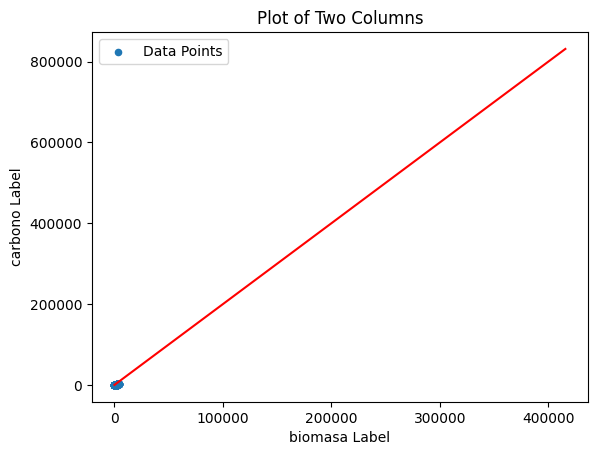

In [12]:
x = resulado.plot(kind='scatter', x='biomasa', y='carbono', label='Data Points')

# Now, use matplotlib's plot and axhline directly
# Plot the line x = y
plt.plot([x / 2 for x in range(len(df))],range(len(df)), color='red', label='x = y')

# Plot the line x = y
#ax.plot(range(1000),range(1000), color='red', label='x = y')
# Add labels and title
plt.xlabel('biomasa Label')
plt.ylabel('carbono Label')
plt.title('Plot of Two Columns')
plt.show()

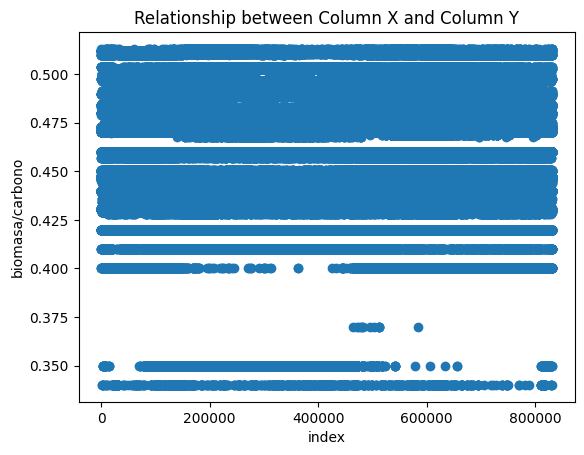

In [13]:
plt.scatter(range(len(resulado)),resulado['carbono']/resulado['biomasa'])

# Add labels and title
plt.xlabel('index')
plt.ylabel('biomasa/carbono')
plt.title('Relationship between Column X and Column Y')

# Show the plot
plt.show()

In [14]:
r4000 = resulado[resulado.biomasa > 4000]
r4000

,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad,carbon_eq,biomasa_eq,densidad_eq,volumen_eq,volumen,biomasa,carbono
214198,3100372,2019,36499,1,Vivo,NaN,Ericaceae,Arbutus,xalapensis,NaN,NaN,3,3.0,NaN,68.845396,36.0,2.0,24.565917,-105.033750,13.2,BP,756445,3,NaN,NaN,NaN,NaN,13,13.2.1,13.2.1.1,10,Durango,NaN,[b]*0.4715,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.55594,NaN,NaN,4066.337884,1917.278312
589851,3476025,2018,76494,1,Vivo,NaN,Fabaceae,Inga,vera,NaN,NaN,15,15.0,NaN,37.600000,17.2,0.0,16.202278,-93.606139,13.6,BM,716307,15,NaN,NaN,NaN,NaN,13,13.6.1,13.6.1.2,7,Chiapas,NaN,[b]*0.46,Exp(-4.0400)*([d130]**4.0000)*(([d130]** -0.29...,0.57667,NaN,NaN,4291.338004,1974.015482
637111,3523285,2016,59551,2,Vivo,NaN,Fagaceae,Quercus,laurina,NaN,NaN,23,25.0,NaN,61.389480,37.8,2.0,19.645278,-100.858639,13.4,BM,452224,25,NaN,NaN,NaN,NaN,13,13.4.2,13.4.2.2,16,Michoacán de Ocampo,NaN,(0.4726*[b]),(0.283)*((([d130]**2)*[ht])**0.807),0.62561,NaN,NaN,4081.369915,1928.855422


In [28]:
predic = resulado[resulado.is_predicted != 0]

In [34]:
predic


,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,altura_original,diametro_original,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad,carbon_eq,biomasa_eq,densidad_eq,volumen_eq,volumen,biomasa,carbono
38,2886212,2017,49581,1,Vivo,NaN,Boraginaceae,Bourreria,pulchra,NaN,NaN,40,47.0,NaN,12.685755,10.600000,2.0,10.6,NaN,20.950306,-88.417028,15.2,SMS,659936,47,NaN,NaN,NaN,NaN,15,15.2.1,15.2.1.1,31,Yucatán,NaN,[b]*0.431,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.61149,NaN,NaN,65.310990,28.149037
74,2886248,2016,50750,3,Muerto,NaN,ZZ Familia Desconocida,ZZ Genero Desconocido,NaN,NaN,NaN,15,17.0,NaN,22.700000,6.311880,1.0,0.7,22.7,20.667528,-87.967778,15.2,SMS,484647,17,NaN,NaN,NaN,NaN,15,15.2.1,15.2.1.1,31,Yucatán,NaN,[b]*0.447,(3.14159 * (([d130] / 2 / 100) ** 2) * [ht]) / 3,0.61222,(3.14159 * (([d130] / 2 / 100) ** 2) * [ht]) / 3,0.085149,0.085149,0.038062
76,2886250,2016,50750,4,Vivo,NaN,Fabaceae,Mimosa,bahamensis,NaN,NaN,13,15.0,NaN,11.496465,6.300000,2.0,6.3,NaN,20.667528,-87.967778,15.2,SMS,484678,15,NaN,NaN,NaN,NaN,15,15.2.1,15.2.1.1,31,Yucatán,NaN,[b]*0.46,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.67632,NaN,NaN,37.133612,17.081461
120,2886294,2019,49847,3,Vivo,NaN,Fagaceae,Quercus,xalapensis,NaN,NaN,4,4.0,NaN,47.694669,28.400000,2.0,28.4,NaN,21.433889,-105.011611,13.4,BM,857560,4,NaN,NaN,NaN,NaN,13,13.4.2,13.4.2.4,18,Nayarit,NaN,[b]*0.45,(Exp(-2.144)*[d130]**2.403),0.60368,NaN,NaN,1265.422816,569.440267
150,2886324,2015,50699,1,Vivo,NaN,Combretaceae,Laguncularia,racemosa,NaN,NaN,11,12.0,NaN,12.683062,6.500000,2.0,6.5,NaN,20.876306,-90.265639,14.2,SBQ,11388,11,NaN,NaN,NaN,NaN,14,14.2.1,14.2.1.1,31,Yucatán,NaN,[b]*0.45,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.56375,NaN,NaN,38.719385,17.423723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830824,3716998,2015,50039,3,Vivo,NaN,Fabaceae,Lonchocarpus,guatemalensis,NaN,NaN,45,48.0,NaN,12.707892,7.700000,2.0,7.7,NaN,20.881111,-88.666444,15.2,SMS,15869,45,NaN,NaN,NaN,NaN,15,15.2.1,15.2.1.1,31,Yucatán,NaN,[b]*0.44,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.57825,NaN,NaN,46.449824,20.437923
830945,3717119,2018,50479,4,Vivo,NaN,Fabaceae,Lysiloma,latisiliquum,NaN,NaN,5,6.0,NaN,10.717691,5.400000,2.0,5.4,NaN,20.883639,-89.780667,14.2,SMC,720103,6,NaN,NaN,NaN,NaN,14,14.2.1,14.2.1.2,31,Yucatán,NaN,(0.4709*[b]),Exp(-1.852)*([d130]**2.378),0.53441,NaN,NaN,44.184231,20.806354
831134,3717308,2015,49969,2,Vivo,NaN,Cupressaceae,Juniperus,deppeana,NaN,NaN,28,29.0,NaN,16.500000,5.742800,1.0,NaN,16.5,21.435861,-99.098639,13.3,BQP,120154,28,NaN,NaN,NaN,NaN,13,13.3.1,13.3.1.1,24,San Luis Potosí,NaN,[b]*0.48,Exp(-1.6469)*([d130]**2.1255),0.44390,NaN,NaN,74.562857,35.790171
831135,3717309,2015,49969,2,Vivo,NaN,Pinaceae,Pinus,teocote,NaN,NaN,41,42.0,NaN,18.300000,9.967993,1.0,NaN,18.3,21.435861,-99.098639,13.3,BQP,120166,41,NaN,NaN,NaN,NaN,13,13.3.1,13.3.1.1,24,San Luis Potosí,NaN,(0.4748*[b]),(0.40196)*([d130]**2),0.45658,NaN,NaN,134.612384,63.913960


In [30]:
index = predic.index
original_predic = df.loc[index]
altura = original_predic.altura
diametro = original_predic.diametro

predic.insert(17, 'altura_original', altura)
predic.insert(18, 'diametro_original', diametro)


In [22]:
predic.iloc[0,16]

np.float64(2.0)

In [31]:
predic

,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,altura_original,diametro_original,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad,carbon_eq,biomasa_eq,densidad_eq,volumen_eq,volumen,biomasa,carbono
38,2886212,2017,49581,1,Vivo,NaN,Boraginaceae,Bourreria,pulchra,NaN,NaN,40,47.0,NaN,12.685755,10.600000,2.0,10.6,NaN,20.950306,-88.417028,15.2,SMS,659936,47,NaN,NaN,NaN,NaN,15,15.2.1,15.2.1.1,31,Yucatán,NaN,[b]*0.431,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.61149,NaN,NaN,65.310990,28.149037
74,2886248,2016,50750,3,Muerto,NaN,ZZ Familia Desconocida,ZZ Genero Desconocido,NaN,NaN,NaN,15,17.0,NaN,22.700000,6.311880,1.0,0.7,22.7,20.667528,-87.967778,15.2,SMS,484647,17,NaN,NaN,NaN,NaN,15,15.2.1,15.2.1.1,31,Yucatán,NaN,[b]*0.447,(3.14159 * (([d130] / 2 / 100) ** 2) * [ht]) / 3,0.61222,(3.14159 * (([d130] / 2 / 100) ** 2) * [ht]) / 3,0.085149,0.085149,0.038062
76,2886250,2016,50750,4,Vivo,NaN,Fabaceae,Mimosa,bahamensis,NaN,NaN,13,15.0,NaN,11.496465,6.300000,2.0,6.3,NaN,20.667528,-87.967778,15.2,SMS,484678,15,NaN,NaN,NaN,NaN,15,15.2.1,15.2.1.1,31,Yucatán,NaN,[b]*0.46,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.67632,NaN,NaN,37.133612,17.081461
120,2886294,2019,49847,3,Vivo,NaN,Fagaceae,Quercus,xalapensis,NaN,NaN,4,4.0,NaN,47.694669,28.400000,2.0,28.4,NaN,21.433889,-105.011611,13.4,BM,857560,4,NaN,NaN,NaN,NaN,13,13.4.2,13.4.2.4,18,Nayarit,NaN,[b]*0.45,(Exp(-2.144)*[d130]**2.403),0.60368,NaN,NaN,1265.422816,569.440267
150,2886324,2015,50699,1,Vivo,NaN,Combretaceae,Laguncularia,racemosa,NaN,NaN,11,12.0,NaN,12.683062,6.500000,2.0,6.5,NaN,20.876306,-90.265639,14.2,SBQ,11388,11,NaN,NaN,NaN,NaN,14,14.2.1,14.2.1.1,31,Yucatán,NaN,[b]*0.45,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.56375,NaN,NaN,38.719385,17.423723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830824,3716998,2015,50039,3,Vivo,NaN,Fabaceae,Lonchocarpus,guatemalensis,NaN,NaN,45,48.0,NaN,12.707892,7.700000,2.0,7.7,NaN,20.881111,-88.666444,15.2,SMS,15869,45,NaN,NaN,NaN,NaN,15,15.2.1,15.2.1.1,31,Yucatán,NaN,[b]*0.44,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...,0.57825,NaN,NaN,46.449824,20.437923
830945,3717119,2018,50479,4,Vivo,NaN,Fabaceae,Lysiloma,latisiliquum,NaN,NaN,5,6.0,NaN,10.717691,5.400000,2.0,5.4,NaN,20.883639,-89.780667,14.2,SMC,720103,6,NaN,NaN,NaN,NaN,14,14.2.1,14.2.1.2,31,Yucatán,NaN,(0.4709*[b]),Exp(-1.852)*([d130]**2.378),0.53441,NaN,NaN,44.184231,20.806354
831134,3717308,2015,49969,2,Vivo,NaN,Cupressaceae,Juniperus,deppeana,NaN,NaN,28,29.0,NaN,16.500000,5.742800,1.0,NaN,16.5,21.435861,-99.098639,13.3,BQP,120154,28,NaN,NaN,NaN,NaN,13,13.3.1,13.3.1.1,24,San Luis Potosí,NaN,[b]*0.48,Exp(-1.6469)*([d130]**2.1255),0.44390,NaN,NaN,74.562857,35.790171
831135,3717309,2015,49969,2,Vivo,NaN,Pinaceae,Pinus,teocote,NaN,NaN,41,42.0,NaN,18.300000,9.967993,1.0,NaN,18.3,21.435861,-99.098639,13.3,BQP,120166,41,NaN,NaN,NaN,NaN,13,13.3.1,13.3.1.1,24,San Luis Potosí,NaN,(0.4748*[b]),(0.40196)*([d130]**2),0.45658,NaN,NaN,134.612384,63.913960


In [32]:
predic.to_csv("resultados_modificados.csv")

In [33]:
r4000.to_csv("bio_m_4000.csv")